In [89]:
import torch
import torch.nn as nn
import gensim
from transformers import BertTokenizer, BertModel

# Load pre-trained Word2Vec embeddings
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

# Define a sample sentence
sentence = "I swam across river to get to the other bank."

# Tokenize the sentence using a tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokens = tokenizer.tokenize(sentence)
input_ids = tokenizer.convert_tokens_to_ids(tokens)
input_ids = torch.tensor(input_ids).unsqueeze(0)  # Add batch dimension


In [92]:
# Load a pre-trained BERT model for self-attention
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Get Word2Vec embeddings for the tokens
word2vec_embeddings = []
for token in tokens:
    if token in word2vec_model:
        word2vec_embeddings.append(word2vec_model[token])
    else:
        # If the token is not in Word2Vec, use a zero vector or other strategies.
        word2vec_embeddings.append([0.0] * word2vec_model.vector_size)

word2vec_embeddings = torch.tensor(word2vec_embeddings).unsqueeze(0)  # Add batch dimension

# # Pass the Word2Vec embeddings through the BERT model
# with torch.no_grad():
#     outputs = bert_model(input_ids)
#     bert_embeddings = outputs.last_hidden_state

# # Implement self-attention
# self_attention = nn.MultiheadAttention(embed_dim=word2vec_embeddings.size(2), num_heads=4)
# output, _ = self_attention(word2vec_embeddings.permute(1, 0, 2), word2vec_embeddings.permute(1, 0, 2), word2vec_embeddings.permute(1, 0, 2))


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [93]:
result = torch.matmul(word2vec_embeddings.view(11,300),word2vec_embeddings.view(300,11))

In [112]:
softmax = nn.Softmax()
print(torch.sum(softmax(result[1])))
print(softmax(result))

tensor(1.)
tensor([[0.0864, 0.0759, 0.1066, 0.0636, 0.0868, 0.0900, 0.1149, 0.0790, 0.1336,
         0.1022, 0.0610],
        [0.0774, 0.1296, 0.1107, 0.0453, 0.1457, 0.0303, 0.0895, 0.0766, 0.0917,
         0.1309, 0.0723],
        [0.0776, 0.0792, 0.0780, 0.1078, 0.1056, 0.0786, 0.0830, 0.1063, 0.0658,
         0.0979, 0.1203],
        [0.0819, 0.0911, 0.0691, 0.0716, 0.0682, 0.0445, 0.0674, 0.0623, 0.1261,
         0.1524, 0.1654],
        [0.0909, 0.0909, 0.0909, 0.0909, 0.0909, 0.0909, 0.0909, 0.0909, 0.0909,
         0.0909, 0.0909],
        [0.0916, 0.0923, 0.0714, 0.0727, 0.0875, 0.0917, 0.0843, 0.1027, 0.1121,
         0.0782, 0.1157],
        [0.0909, 0.0909, 0.0909, 0.0909, 0.0909, 0.0909, 0.0909, 0.0909, 0.0909,
         0.0909, 0.0909],
        [0.0925, 0.0947, 0.0970, 0.1038, 0.0810, 0.0891, 0.0804, 0.0907, 0.0939,
         0.0888, 0.0881],
        [0.1055, 0.1042, 0.0815, 0.0976, 0.0724, 0.0920, 0.0729, 0.1169, 0.0776,
         0.0535, 0.1259],
        [0.0955, 0.1161, 0

d:\anaconda3\envs\deepgcn\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  
d:\anaconda3\envs\deepgcn\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  This is separate from the ipykernel package so we can avoid doing imports until


d:\anaconda3\envs\deepgcn\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """


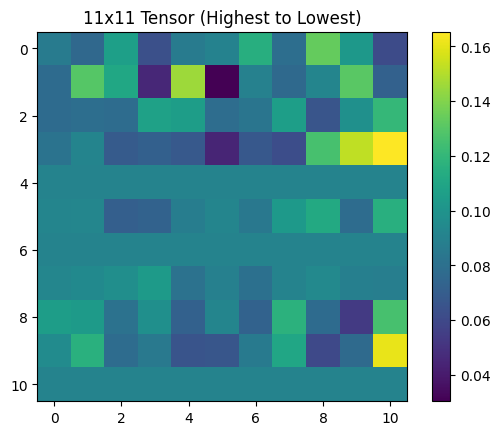

In [113]:
import numpy as np
import matplotlib.pyplot as plt

# Reshape the sorted values back to an 11x11 tensor
sorted_tensor = softmax(result)
# Create a heatmap of the sorted tensor
plt.imshow(sorted_tensor)  # You can change the colormap to your preference
plt.colorbar()
plt.title('11x11 Tensor (Highest to Lowest)')
plt.show()

In [114]:
softmax(result)

d:\anaconda3\envs\deepgcn\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


tensor([[0.0864, 0.0759, 0.1066, 0.0636, 0.0868, 0.0900, 0.1149, 0.0790, 0.1336,
         0.1022, 0.0610],
        [0.0774, 0.1296, 0.1107, 0.0453, 0.1457, 0.0303, 0.0895, 0.0766, 0.0917,
         0.1309, 0.0723],
        [0.0776, 0.0792, 0.0780, 0.1078, 0.1056, 0.0786, 0.0830, 0.1063, 0.0658,
         0.0979, 0.1203],
        [0.0819, 0.0911, 0.0691, 0.0716, 0.0682, 0.0445, 0.0674, 0.0623, 0.1261,
         0.1524, 0.1654],
        [0.0909, 0.0909, 0.0909, 0.0909, 0.0909, 0.0909, 0.0909, 0.0909, 0.0909,
         0.0909, 0.0909],
        [0.0916, 0.0923, 0.0714, 0.0727, 0.0875, 0.0917, 0.0843, 0.1027, 0.1121,
         0.0782, 0.1157],
        [0.0909, 0.0909, 0.0909, 0.0909, 0.0909, 0.0909, 0.0909, 0.0909, 0.0909,
         0.0909, 0.0909],
        [0.0925, 0.0947, 0.0970, 0.1038, 0.0810, 0.0891, 0.0804, 0.0907, 0.0939,
         0.0888, 0.0881],
        [0.1055, 0.1042, 0.0815, 0.0976, 0.0724, 0.0920, 0.0729, 0.1169, 0.0776,
         0.0535, 0.1259],
        [0.0955, 0.1161, 0.0779, 0.08

In [19]:
new_tensor = word2vec_embeddings[0].view(300, 15)
torch.mul(new_tensor, word2vec_embeddings[0]).shape

RuntimeError: The size of tensor a (15) must match the size of tensor b (300) at non-singleton dimension 1

In [53]:
word2vec_embeddings.shape

torch.Size([1, 15, 300])

In [46]:
torch.manual_seed(1)

user = torch.Tensor([[1,0],[0,1],[1,0],[1,1]])
movie = torch.Tensor([[3,1,1,3,1],[1,2,4,1,3]])
# torch.sum(torch.mul(b, c),axis=1)
torch.matmul(user, movie)

tensor([[3., 1., 1., 3., 1.],
        [1., 2., 4., 1., 3.],
        [3., 1., 1., 3., 1.],
        [4., 3., 5., 4., 4.]])

In [49]:
user = torch.rand(4,2)
print(user)
movie = torch.rand(2,5)
print(movie)
torch.matmul(user, movie)

tensor([[0.9371, 0.6556],
        [0.3138, 0.1980],
        [0.4162, 0.2843],
        [0.3398, 0.5239]])
tensor([[0.7981, 0.7718, 0.0112, 0.8100, 0.6397],
        [0.9743, 0.8300, 0.0444, 0.0246, 0.2588]])


tensor([[1.3866, 1.2674, 0.0396, 0.7751, 0.7691],
        [0.4434, 0.4065, 0.0123, 0.2590, 0.2520],
        [0.6092, 0.5572, 0.0173, 0.3441, 0.3398],
        [0.7816, 0.6971, 0.0271, 0.2881, 0.3530]])

In [53]:
torch.Tensor([0.9371, 0.6556]) *  torch.Tensor([0.7981, 0.9743])

tensor([0.7479, 0.6388])

In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F
torch.manual_seed(1337)

B,T,C = 2,4,16
x = torch.randn(B,T,C)
x

head_size = 8
key = nn.Linear(C,head_size, bias=False)
value = nn.Linear(C,head_size, bias=False)
query  = nn.Linear(C,head_size, bias=False)

k = key(x)
q = query(x)

wei = q @ k.permute(0,2,1)

# v = value(x)
tril = torch.tril(torch.ones(T,T))
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei,dim= -1)

v = value(x)
out = wei @ v
print(out)




tensor([[[-0.1264, -0.1940,  0.3937,  0.1021, -0.7483,  0.5508,  0.3210,
          -0.5012],
         [ 0.6855,  0.5035, -0.6155,  0.2949,  0.6744,  0.1611, -0.1048,
          -1.0192],
         [-0.9521, -0.7735,  0.4557, -0.4738, -0.7542, -0.7260, -0.0103,
          -0.2693],
         [ 0.9037, -0.9013, -0.2339,  0.3013,  0.6641, -0.0033, -0.0853,
          -1.2877]],

        [[ 0.0765, -0.2607,  0.0106, -0.3896,  0.5297,  0.6772,  0.3032,
           0.3790],
         [ 0.0099,  0.0607, -0.5835, -0.1111,  1.1962, -0.7374, -0.8543,
          -0.8504],
         [ 0.1832,  0.1216,  0.1411, -0.9431,  0.5114,  0.5078, -0.4454,
           0.1776],
         [-0.7331, -0.3392,  0.3754,  0.4353, -0.5939, -0.6783,  0.6507,
          -0.2571]]], grad_fn=<UnsafeViewBackward0>)
tensor([[[-0.1264, -0.1940,  0.3937,  0.1021, -0.7483,  0.5508,  0.3210,
          -0.5012],
         [ 0.2337,  0.1153, -0.0538,  0.1876, -0.1174,  0.3780,  0.1321,
          -0.7310],
         [ 0.4484,  0.3065, -0.3710

In [45]:
k.transpose(2,1).shape

torch.Size([4, 16, 8])

In [39]:
import torch

# Create a sample tensor
x = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])

print(x.shape)
# Transpose the tensor
x_transposed = x.transpose(1,0)
print(" ")
print(x_transposed.shape)
print(" ")
print(x)
print(x_transposed)

torch.Size([2, 3])
 
torch.Size([3, 2])
 
tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1, 4],
        [2, 5],
        [3, 6]])
